<div style="display:fill; padding:5px 0;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px; text-align:center; font-family:'Palatino Linotype', 'Book Antiqua', Palatino, serif;"><span style="font-size:26px; color:#960; font-weight:bold;">RETRIEVING DATA</span></div>

<span style="font-size:20px; color:#339; font-weight:bold">Import Libraries</span>

In [1]:
# Import libraries

# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from scipy.stats import norm
from scipy import stats

<span style="font-size:20px; color:#339; font-weight:bold">Reading and understanding data</span>

In [2]:
# Reading data
df = pd.read_csv('D:/Pedoman/Porto Folios/Customer Segmentation/customer_data.csv') # Loading data
df.head() # Displaying the first 5 lines of the dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [3]:
# Let's look at the dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 2627 records and 10 columns.


In [4]:
# Get concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [5]:
# Data type of each columns
print(df.dtypes)

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object


<div style="display:fill; padding:5px 0;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px; text-align:center; font-family:'Palatino Linotype', 'Book Antiqua', Palatino, serif;"><span style="font-size:26px; color:#960; font-weight:bold;">DATA WRANGLING</span></div>

In [6]:
# Keep a copy our original data
data_ori = df.copy()

In [7]:
# Drop unused columns
df = df.drop('Var_1', axis=1)

In [8]:
# Checking the unique values
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
ID,2627
Gender,2
Ever_Married,3
Age,67
Graduated,3
Profession,10
Work_Experience,16
Spending_Score,3
Family_Size,10


In [9]:
# Checking the duplicates
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)

(2627, 9)


In [10]:
# Check the number of missing values in each column
df.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
dtype: int64

In [11]:
# Mask missing values with 'Unspecified'
df[['Profession']] = df[['Profession']].fillna('Unspecified')

In [12]:
# Check again the number of missing values in each column
df.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession           0
Work_Experience    269
Spending_Score       0
Family_Size        113
dtype: int64

In [13]:
# Replace missing values with substituted values
for i in df.columns:
    if sum(df[i].isna()) != 0:
        if i != ["Work_Experience","Family_Size"]:
            df[i]=df[i].fillna(df[i].mode().values[0])
        else:
            df[i]=df[i].fillna(df[i].mean())

In [14]:
# Checking again the unique values
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
ID,2627
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,10
Work_Experience,15
Spending_Score,3
Family_Size,9


In [15]:
# Keep a copy our cleaned data
cleaned_data = df.copy()

<div style="display:fill; padding:5px 0;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px; text-align:center; font-family:'Palatino Linotype', 'Book Antiqua', Palatino, serif;"><span style="font-size:26px; color:#960; font-weight:bold;">EXPLORATORY DATA ANALYSIS</span></div>

In [16]:
df = df.drop('ID', axis=1)

<span style="font-size:20px; color:#339; font-weight:bold">Distribution of features</span>

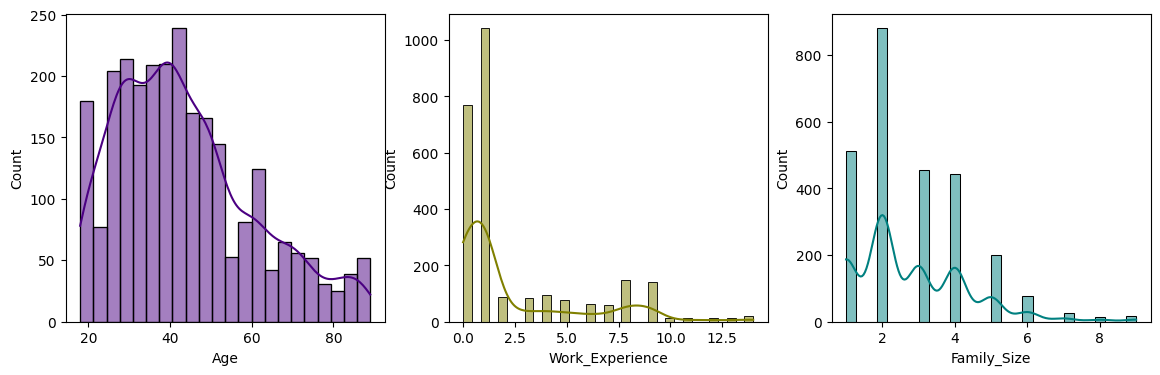

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.histplot(data=df, x="Age", kde=True, color="#4b0082", ax=axs[0])
sns.histplot(data=df, x="Work_Experience", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="Family_Size", kde=True, color="teal", ax=axs[2])

plt.show()

<span style="font-size:20px; color:#339; font-weight:bold">Box plot</span>

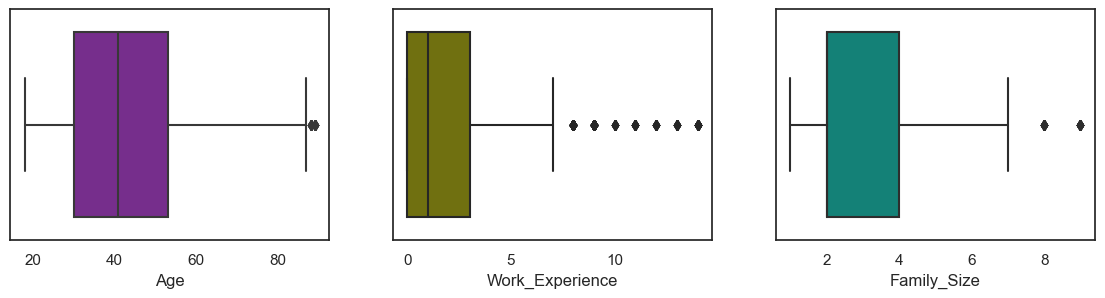

In [18]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

fig, axs = plt.subplots(1, 3, figsize=(14, 3))
sns.boxplot(data=df, x="Age", color="#7e1e9c", ax=axs[0])
sns.boxplot(data=df, x="Work_Experience", color="#808000", ax=axs[1])
sns.boxplot(data=df, x="Family_Size", color="#029386", ax=axs[2])

plt.show()

<span style="font-size:20px; color:#339; font-weight:bold">Pair plot of features</span>

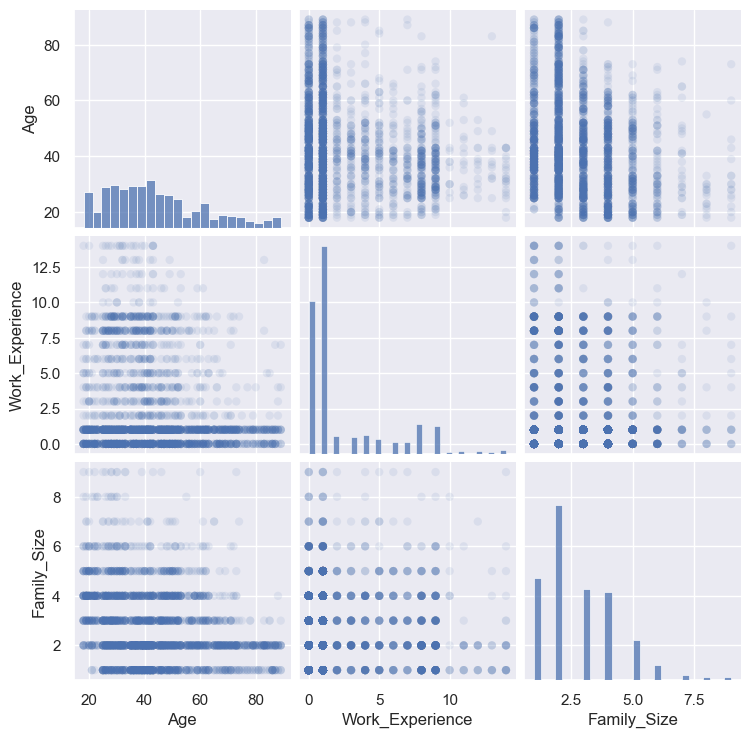

In [19]:
sns.set_context('talk')
sns.set(rc = {'figure.figsize': (2, 1)})
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

<div style="display:fill; padding:5px 0;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px; text-align:center; font-family:'Palatino Linotype', 'Book Antiqua', Palatino, serif;"><span style="font-size:26px; color:#960; font-weight:bold;">FEATURE ENGINEERING AND VARIABLE TRANSFORMATION</span></div>

<span style="font-size:20px; color:#339; font-weight:bold">Feature Encoding</span>

In [20]:
# Drop unused variables
df = df.drop('Profession', axis=1)

In [21]:
# Get the binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['Gender', 'Ever_Married', 'Graduated']

In [22]:
# Get the categorical variables
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Spending_Score']

In [23]:
# Look at the unique values of categorical variables
[[i, list(df[i].unique())] for i in categorical_variables]

[['Spending_Score', ['Low', 'Average', 'High']]]

In [24]:
ordinal_variables = ['Family_Size']
[[i, list(df[i].unique())] for i in ordinal_variables]

[['Family_Size', [1.0, 4.0, 2.0, 5.0, 3.0, 6.0, 8.0, 7.0, 9.0]]]

In [25]:
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

In [26]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [27]:
lb, le = LabelBinarizer(), LabelEncoder()

In [28]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In [29]:
df[ordinal_variables].astype('category').describe()

,Family_Size
count,2627
unique,9
top,1
freq,881


In [30]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [31]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
[[i, list(df[i].unique())] for i in categorical_variables]

[['Spending_Score', ['Low', 'Average', 'High']]]

In [32]:
df = pd.get_dummies(df, columns = categorical_variables)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2627.0,0.542063,0.498322,0.0,0.0,1.0,1.0,1.0
Ever_Married,2627.0,0.597640,0.490467,0.0,0.0,1.0,1.0,1.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Graduated,2627.0,0.618957,0.485736,0.0,0.0,1.0,1.0,1.0
Work_Experience,2627.0,2.393605,3.200165,0.0,0.0,1.0,3.0,14.0
Family_Size,2627.0,1.789874,1.527360,0.0,1.0,1.0,3.0,8.0
Spending_Score_Average,2627.0,0.237914,0.425887,0.0,0.0,0.0,0.0,1.0
Spending_Score_High,2627.0,0.146936,0.354109,0.0,0.0,0.0,0.0,1.0
Spending_Score_Low,2627.0,0.615150,0.486652,0.0,0.0,1.0,1.0,1.0


In [34]:
df.head(10)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0,1,36,1,0.0,0,0,0,1
1,1,1,37,1,8.0,3,1,0,0
2,0,1,69,0,0.0,0,0,0,1
3,1,1,59,0,11.0,1,0,1,0
4,0,0,19,0,1.0,3,0,0,1
5,1,1,47,1,0.0,4,0,1,0
6,1,1,61,1,5.0,2,0,0,1
7,0,1,47,1,1.0,2,1,0,0
8,1,1,50,1,2.0,3,1,0,0
9,1,0,19,0,0.0,3,0,0,1


<span style="font-size:20px; color:#339; font-weight:bold">Variable Transformation</span>

<span style="font-size:16px; font-weight:bold">Skew variables</span>

In [35]:
# Create a list of numerical variables to check for skewing
skew_limit = 0.5 # define a limit above which we will log transform
skew_vals = df[numeric_variables].skew()

In [36]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Work_Experience,1.555878
Age,0.704448


Distribution of Numerical Values

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Work_Experience'}>]], dtype=object)

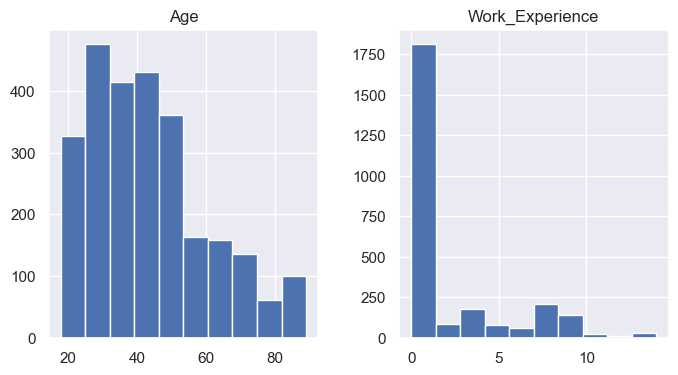

In [37]:
# Distribution of numerical values
df[numeric_variables].hist(figsize=(8, 4))

We see here that the distribution of 'Age' and 'Work_Experience' is a right skewed (positively skewed). So we need data transformations for these two variables.

<span style="font-size:16px; font-weight:bold">Log transforming skew variables</span>

In [38]:
# Let's look at what happens to these features, when we apply np.log1p visually.

def logTransform(field):
    for i in field:
        # Create two "subplots" and a "figure" using matplotlib
        fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(8, 4))

        # Create a histogram on the "ax_before" subplot
        df[i].hist(ax=ax_before)

        # Apply a log transformation (numpy syntax) to this column
        df[i].apply(np.log1p).hist(ax=ax_after)

        # Formatting of titles etc. for each subplot
        ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
        ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
        fig.suptitle('Field "{}"'.format(i));

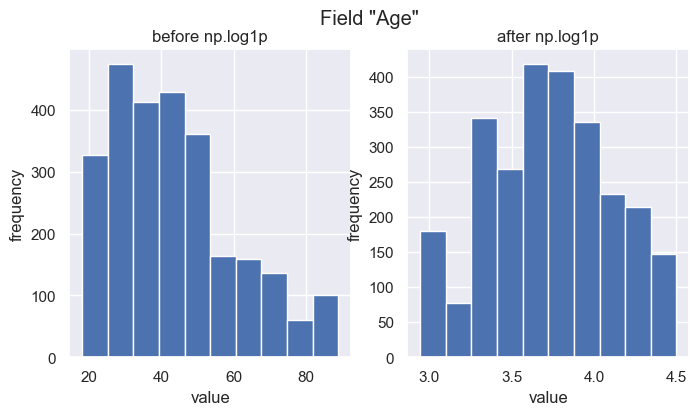

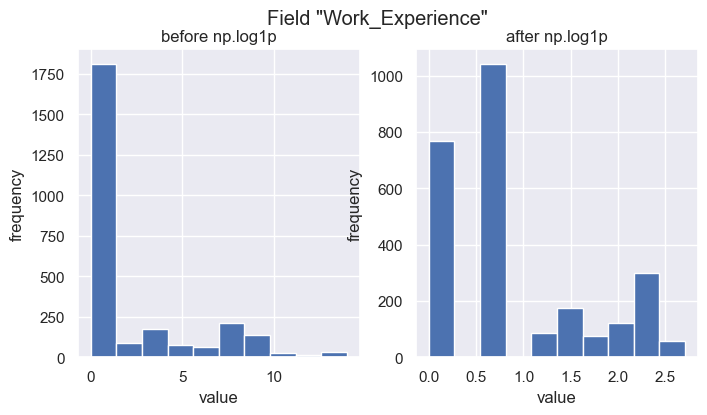

In [39]:
logTransform(numeric_variables)

We can see the log of that data transform from a skewed dataset to a more normally distributed.

In [40]:
# Perform the skew transformation:
for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)

<div style="display:fill; padding:5px 0;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px; text-align:center; font-family:'Palatino Linotype', 'Book Antiqua', Palatino, serif;"><span style="font-size:26px; color:#960; font-weight:bold;">MODEL DEVELOPMENT</span></div>

<span style="font-size:20px; color:#339; font-weight:bold">Clustering the data using K Means</span>

K-means is one of the most customer clustering algorithms. It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.
*   Use elbow method to determine the right value for K, examine results for values of K from 1 to 20.
*   To implement elbow method, fit K-means for various levels of k, save inertia values (sum of squared errors between each datapoint and its cluster center).
*   Generate charts which plot each of these measures as a function of K.
*   Determine the optimal value for K from these charts suggest.

In [41]:
X = pd.DataFrame(df, columns=df.columns)
inertia = list()
list_clusters = list(range(1, 11, 1))
for k in list_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append([k, kmeans.inertia_])

In [42]:
in_results = pd.DataFrame(inertia, columns=['K', 'Inertia'])

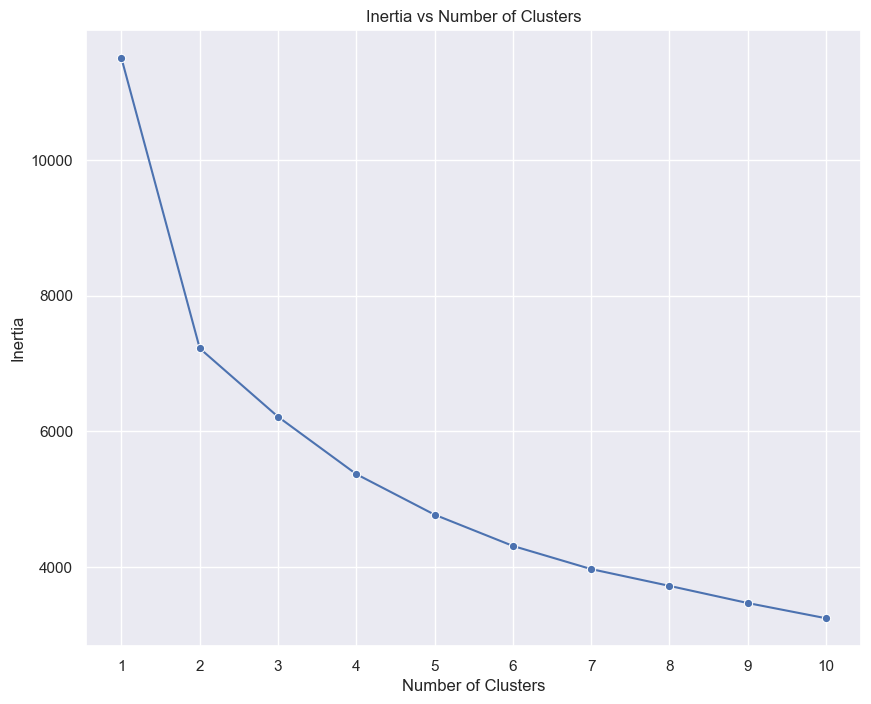

In [43]:
sns.set_context('talk')
sns.set_style('ticks')

sns.set(rc = {'figure.figsize': (10, 8)})
ax = sns.lineplot(data=in_results, x="K", y="Inertia", marker="o")
ax.set(title="Inertia vs Number of Clusters", xlabel='Number of Clusters', ylabel='Inertia')
ax.set_xticks(range(1, 11, 1));

With the elbow method, we are going to select the k value where the decrease in the inertia stabilizes.
At k=4, the descent stabilizes and continues linearly afterwards, forming an elbow at k=4. This points out the optimal number of customer group is 4.

<div style="display:fill; padding:5px 0;
           border-radius:5px;
           background-color:#EBEBD8;
           letter-spacing:0.5px; text-align:center; font-family:'Palatino Linotype', 'Book Antiqua', Palatino, serif;"><span style="font-size:26px; color:#960; font-weight:bold;">K-Means OVERVIEW</span></div>

<span style="font-size:20px; color:#339; font-weight:bold">Cluster visualization</span>

In [44]:
# Final decision
km = KMeans(n_clusters=4, random_state=42)
km_fit = km.fit(X)

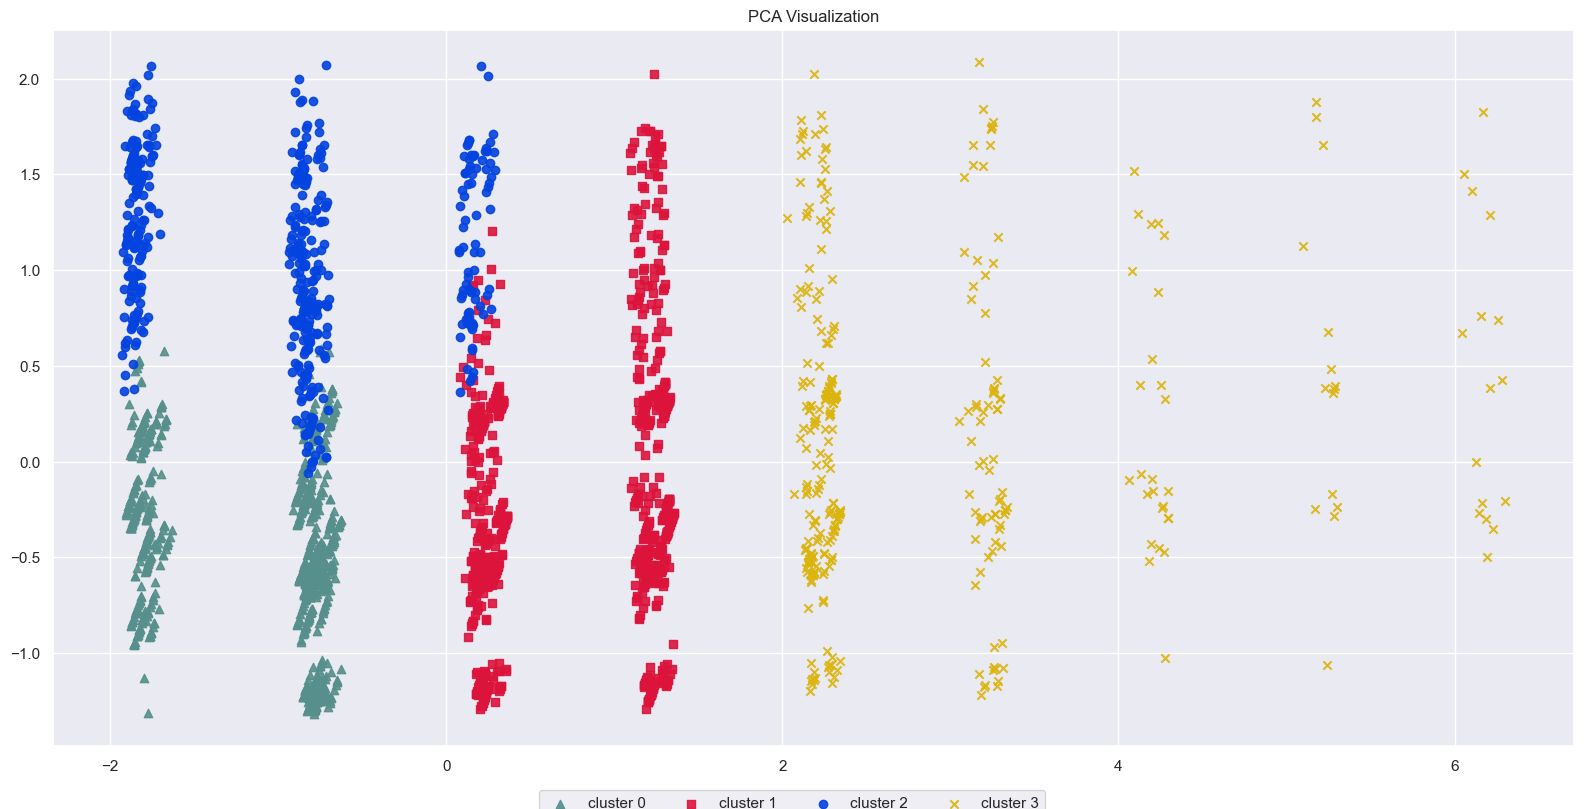

In [45]:
# Visualizing pca
from sklearn.decomposition import PCA

cluster_colors = ['#568f8b', '#dc143c', '#0343df', '#dbb40c']
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_pca = pca_scaled_std.fit_transform(X)

for l, c, m in zip(range(0, 4), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o','x')):
    ax.scatter(X_pca[km_fit.labels_==l,0],
               X_pca[km_fit.labels_==l,1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )
    
ax.set_title("PCA Visualization")

labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

<span style="font-size:20px; color:#339; font-weight:bold">Cluster characteristics</span>

In [46]:
X['cluster'] = km.labels_

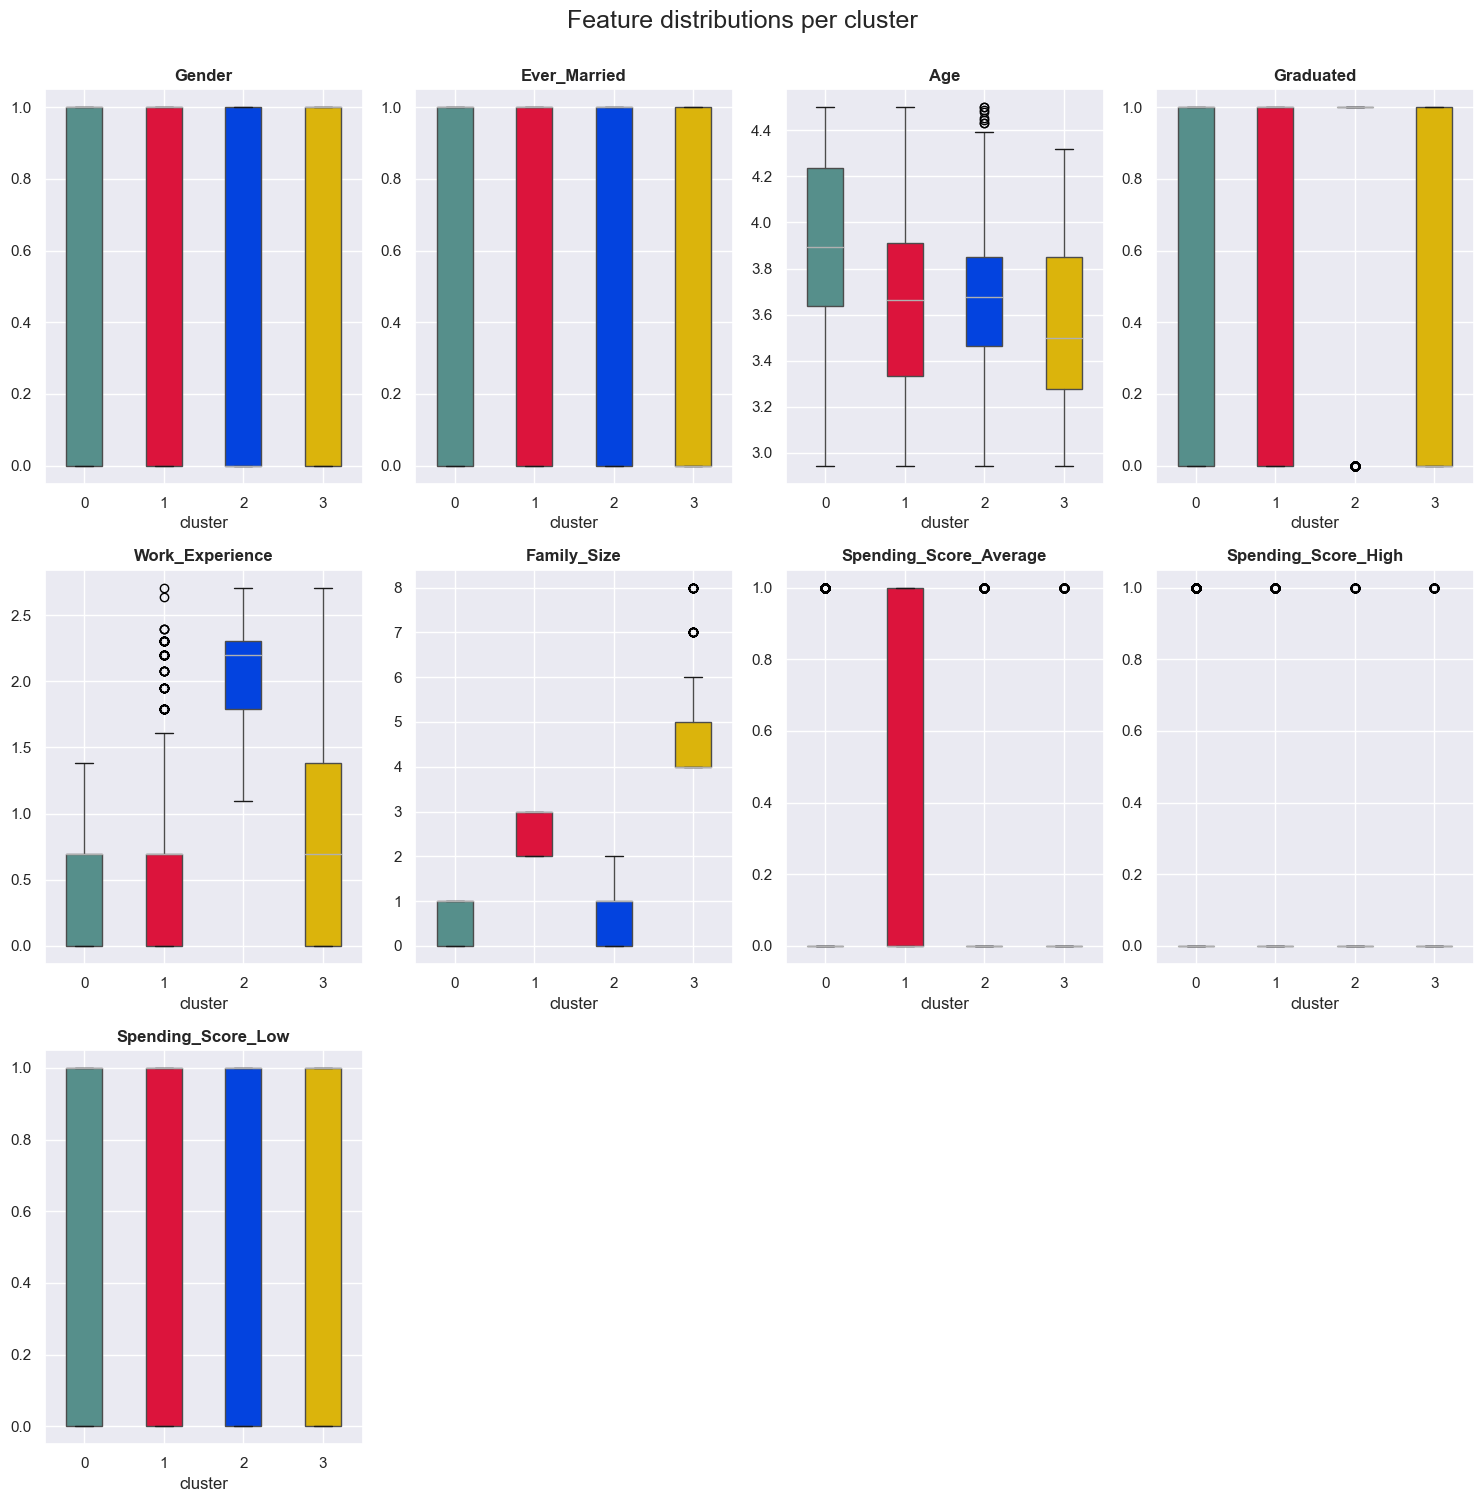

In [47]:
# Each feature distribution per cluster

cluster_colors = ['#568f8b', '#dc143c', '#0343df', '#dbb40c']
features = km.feature_names_in_
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = X[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

<span style="font-size:20px; color:#339; font-weight:bold">Input K-Means Clustering Results Into a Dataframe</span>

In [48]:
data_ori['Cluster'] = X['cluster']
conditions = [
    (data_ori['Cluster']==0),
    (data_ori['Cluster']==1),
    (data_ori['Cluster']==2),
    (data_ori['Cluster']==3)]
choices = ['A','B','C','D']
data_ori['Cluster'] = np.select(conditions, choices)

In [49]:
data_ori.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,A
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,B
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,C
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,D
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,C
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6,B
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6,B
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6,B


In [50]:
data_ori.tail(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
2617,467940,Female,No,27,No,Marketing,8.0,Low,4.0,Cat_2,B
2618,467946,Female,Yes,42,Yes,Artist,0.0,Low,2.0,Cat_6,A
2619,467948,Female,No,19,No,Healthcare,0.0,Low,3.0,Cat_6,B
2620,467949,Male,No,21,No,Healthcare,1.0,Low,4.0,Cat_4,B
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,A
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,A
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,D
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,C


<span style="font-size:20px; color:#339; font-weight:bold">Interpretation of the Results</span>

In [51]:
data_ori.groupby('Cluster')['Cluster'].count()

Cluster
A    981
B    817
C    494
D    335
Name: Cluster, dtype: int64

In [52]:
[[i, list(cleaned_data[i].unique())] for i in binary_variables]

[['Gender', ['Female', 'Male']],
 ['Ever_Married', ['Yes', 'No']],
 ['Graduated', ['Yes', 'No']]]

In [53]:
[[i, list(cleaned_data[i].unique())] for i in categorical_variables]

[['Spending_Score', ['Low', 'Average', 'High']]]

In [54]:
cluster_results = pd.pivot_table(data_ori, values=['Age', 'Work_Experience', 'Family_Size'], index=['Cluster'],
                    aggfunc={'Age': [min, max, np.mean],
                             'Work_Experience': [min, max, np.mean],
                             'Family_Size': [min, max, np.mean]
                            })
cluster_results

Age                Family_Size                Work_Experience  \
        max       mean min         max      mean  min             max   
Cluster                                                                 
A        89  51.977574  18         2.0  1.625000  1.0             3.0   
B        89  39.108935  18         4.0  3.543452  3.0            14.0   
C        89  40.089069  18         3.0  1.798283  1.0            14.0   
D        74  35.588060  18         9.0  5.713433  5.0            14.0   

                        
             mean  min  
Cluster                 
A        0.577482  0.0  
B        1.561475  0.0  
C        7.378543  2.0  
D        2.464052  0.0

In [55]:
# Get mode of each categorical column
from scipy import stats
def getMode(column):
    data_cat = data_ori[data_ori['Cluster'] == 'A']
    mode_A = stats.mode(data_cat[column])
    data_cat = data_ori[data_ori['Cluster'] == 'B']
    mode_B = stats.mode(data_cat[column])
    data_cat = data_ori[data_ori['Cluster'] == 'C']
    mode_C = stats.mode(data_cat[column])
    data_cat = data_ori[data_ori['Cluster'] == 'D']
    mode_D = stats.mode(data_cat[column])
    mode_values = [mode_A, mode_B, mode_C, mode_D]
    return mode_values

In [56]:
# Get interpretation of clustering results
cluster_results['Gender_Mode'] = getMode('Gender')
cluster_results['Ever_Married_Mode'] = getMode('Ever_Married')
cluster_results['Graduated_Mode'] = getMode('Graduated')
cluster_results['Spending_Score_Mode'] = getMode('Spending_Score')
cluster_results

Age                Family_Size                Work_Experience  \
        max       mean min         max      mean  min             max   
Cluster                                                                 
A        89  51.977574  18         2.0  1.625000  1.0             3.0   
B        89  39.108935  18         4.0  3.543452  3.0            14.0   
C        89  40.089069  18         3.0  1.798283  1.0            14.0   
D        74  35.588060  18         9.0  5.713433  5.0            14.0   

                              Gender_Mode Ever_Married_Mode  Graduated_Mode  \
             mean  min                                                        
Cluster                                                                       
A        0.577482  0.0    ([Male], [517])    ([Yes], [662])  ([Yes], [674])   
B        1.561475  0.0    ([Male], [494])    ([Yes], [448])  ([Yes], [435])   
C        7.378543  2.0  ([Female], [269])    ([Yes], [261])  ([Yes], [369])   
D        2.464052  0.0    ([Male], [188])     ([No], [182])   ([No], [207])   

        Spending_Score_Mode  
                             
Cluster                      
A            ([Low], [612])  
B            ([Low], [441])  
C            ([Low], [345])  
D            ([Low], [218])

In [57]:
movies_cat = data_ori.groupby(['Cluster','Graduated']).agg({'ID':'count'}).rename({'ID': 'Total'}, axis = 1)
movies_cat

Total
Cluster Graduated       
A       No           298
        Yes          674
B       No           376
        Yes          435
C       No           120
        Yes          369
D       No           207
        Yes          124